In [ ]:
!pip install pandas matplotlib scikit-learn yfinance

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import yfinance as yf

In [49]:
# Step 1: Load stock data (e.g., S&P 500 stocks)")
sectors = {
    'Technology': [
        'AAPL', 'MSFT', 'GOOGL', 'NVDA', 'INTC', 'AMD', 'CRM', 'ADBE', 'ORCL', 'CSCO',
        'QCOM', 'TXN', 'IBM', 'NOW', 'AMAT', 'ADI', 'MU', 'LRCX', 'KLAC', 'SNPS'
    ],
    'Consumer': [
        'AMZN', 'TSLA', 'WMT', 'HD', 'NKE', 'SBUX', 'MCD', 'PG', 'KO', 'PEP',
        'COST', 'TGT', 'LOW', 'DG', 'DLTR', 'EL', 'CL', 'KMB', 'GIS', 'K'
    ],
    'Financial': [
        'JPM', 'GS', 'V', 'MA', 'BAC', 'WFC', 'MS', 'BLK', 'C', 'AXP',
        'SCHW', 'USB', 'PNC', 'TFC', 'COF', 'ALL', 'MMC', 'AON', 'MET', 'PRU'
    ],
    'Healthcare': [
        'JNJ', 'PFE', 'UNH', 'ABBV', 'MRK', 'LLY', 'TMO', 'ABT', 'DHR', 'BMY',
        'AMGN', 'CVS', 'CI', 'ISRG', 'GILD', 'REGN', 'VRTX', 'HUM', 'BSX', 'ZTS'
    ],
    'Energy': [
        'XOM', 'CVX', 'COP', 'SLB', 'EOG', 'PXD', 'OXY', 'PSX', 'VLO', 'MPC',
        'KMI', 'WMB', 'DVN', 'HAL', 'BKR', 'APA', 'HES', 'FANG', 'MRO', 'CVI'
    ],
    'Industrial': [
        'GE', 'HON', 'UPS', 'BA', 'CAT', 'DE', 'MMM', 'LMT', 'RTX', 'UNP',
        'FDX', 'NSC', 'EMR', 'ETN', 'GD', 'NOC', 'WM', 'RSG', 'PH', 'ROK'
    ],
    'Materials': [
        'LIN', 'SHW', 'APD', 'FCX', 'NEM', 'DOW', 'ECL', 'PPG', 'NUE', 'VMC',
        'ALB', 'CTVA', 'DD', 'FMC', 'CF', 'MOS', 'CE', 'PKG', 'AVY', 'BLL'
    ],
    'Real Estate': [
        'PLD', 'AMT', 'EQIX', 'CCI', 'PSA', 'WELL', 'SPG', 'DLR', 'O', 'VICI',
        'AVB', 'EQR', 'MAA', 'ESS', 'BXP', 'ARE', 'UDR', 'VTR', 'KIM', 'REG'
    ]
}
all_stocks = [stock for sector_stocks in sectors.values() for stock in sector_stocks]
data_close = yf.download(all_stocks, start="2024-01-01", end="2025-02-22")['Close']
data_close = data_close.dropna(axis=1)  # Remove stocks with missing data
data_close

[*********************100%***********************]  160 of 160 completed

3 Failed downloads:
['PXD', 'BLL', 'MRO']: YFTzMissingError('possibly delisted; no timezone found')


Ticker,AAPL,ABBV,ABT,ADBE,ADI,ALB,ALL,AMAT,AMD,AMGN,...,VMC,VRTX,VTR,WELL,WFC,WM,WMB,WMT,XOM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,184.532074,152.743408,107.138481,580.070007,190.350952,144.644806,140.863571,152.821884,138.580002,286.354218,...,222.018478,410.910004,48.882084,88.159309,47.823627,177.070618,33.995880,52.467781,98.105995,194.055588
2024-01-03,183.150375,153.355057,106.816635,571.789978,185.808029,138.037384,142.029175,149.931183,135.320007,289.531708,...,217.778687,410.709991,47.992794,86.859978,47.193474,176.005875,34.751980,52.471073,98.930260,190.462128
2024-01-04,180.824356,154.310791,108.240593,567.049988,182.966232,133.852325,145.457458,147.812637,136.009995,291.919769,...,219.119125,416.149994,47.615807,86.654808,47.775154,176.262192,34.283005,51.963818,98.067657,191.557953
2024-01-05,180.098709,154.960693,108.065033,564.599976,183.438232,133.753876,146.907150,147.505768,138.580002,291.756042,...,220.052475,416.500000,47.055168,86.478958,48.395611,175.256622,34.024590,51.617970,98.364784,192.357590
2024-01-08,184.452560,154.282104,109.625549,580.549988,185.827698,134.492416,146.319458,150.040085,146.179993,299.343658,...,222.415665,419.119995,47.084171,87.739212,48.395611,175.719986,34.120304,52.125217,96.725830,193.640961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-14,244.600006,192.869995,130.610001,460.160004,214.610001,81.209999,187.630005,168.811172,113.099998,291.160004,...,270.459991,459.000000,66.529999,149.970001,79.980003,227.729996,56.980000,104.040001,108.239998,157.520004
2025-02-18,244.470001,196.250000,130.179993,464.109985,220.220001,83.580002,188.949997,171.604736,114.279999,292.799988,...,272.760010,462.109985,66.769997,150.800003,80.779999,228.350006,57.799999,103.779999,110.139999,156.479996
2025-02-19,244.869995,197.350006,132.130005,456.989990,241.660004,83.669998,191.600006,173.660004,114.690002,294.269989,...,264.970001,471.760010,66.959999,149.710007,80.349998,228.520004,58.270000,104.000000,110.300003,156.639999


In [50]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_close)
data_scaled

array([[-0.98097397, -1.64640866, -0.6249333 , ..., -1.42614681,
        -1.8485226 ,  1.53431156],
       [-1.03425079, -1.59977215, -0.66999251, ..., -1.42591951,
        -1.72509364,  1.21893311],
       [-1.1239396 , -1.52690006, -0.47063502, ..., -1.4609433 ,
        -1.85426346,  1.31510773],
       ...,
       [ 1.34559164,  1.75472085,  2.87393962, ...,  2.13192905,
        -0.02253864, -1.74945114],
       [ 1.38260847,  2.02387348,  3.01954116, ...,  1.66310898,
         0.23202632, -1.68099489],
       [ 1.37181202,  2.11536992,  3.26454534, ...,  1.49532801,
         0.03586157, -1.41418988]], shape=(286, 157))

In [51]:
max_K = 20

## 1. Elbow Method

**Concept:** The Elbow Method plots the Within-Cluster Sum of Squares (WCSS) against different values of k. The point where the decrease in WCSS slows down (forming an "elbow" shape) is the optimal k.

**Steps:**
1. Run K-Means for different values of k (e.g., k=1 to k=10).
2. Compute the WCSS (sum of squared distances of each point to its cluster centroid).
3. Plot WCSS vs. k.
4. Identify the "elbow point" (where the rate of decrease slows).

**Formula for WCSS:**

\[ \text{WCSS} = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2 \]

where:
- \( k \) = number of clusters,
- \( C_i \) = points in cluster \( i \),
- \( \mu_i \) = centroid of cluster \( i \).

**Example usage:**


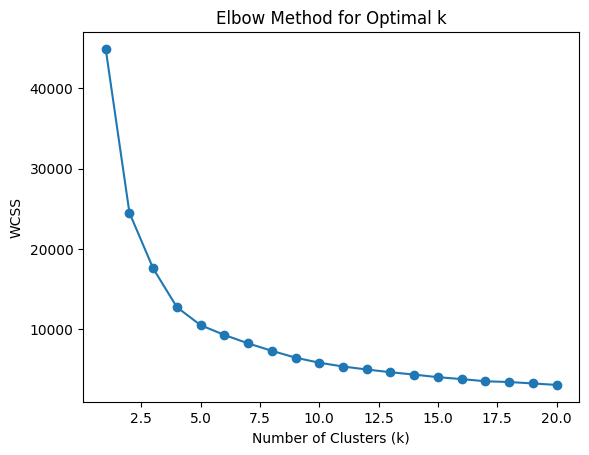

In [52]:
from sklearn.cluster import KMeans

def elbow_method(X, max_k=10):
    wcss = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)  # inertia_ is WCSS
    
    plt.plot(range(1, max_k + 1), wcss, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.title('Elbow Method for Optimal k')
    plt.show()

elbow_method(data_scaled, max_K)

## 2. Silhouette Score

**Concept:** Measures how well-separated clusters are by calculating how similar a point is to its own cluster vs. other clusters. Higher scores indicate better clustering.

**Formula:**

\[ S(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))} \]

where:

- \( a(i) \) = average distance of point \( i \) to other points in its own cluster.
- \( b(i) \) = average distance of point \( i \) to the nearest neighboring cluster.

**S(i) ranges from -1 to 1:**
- 1 → Well-clustered.
- 0 → Borderline.
- -1 → Misclassified.

**Steps:**
1. Run K-Means for different values of k.
2. Compute the silhouette score for each k.
3. Choose k that maximizes the silhouette score.


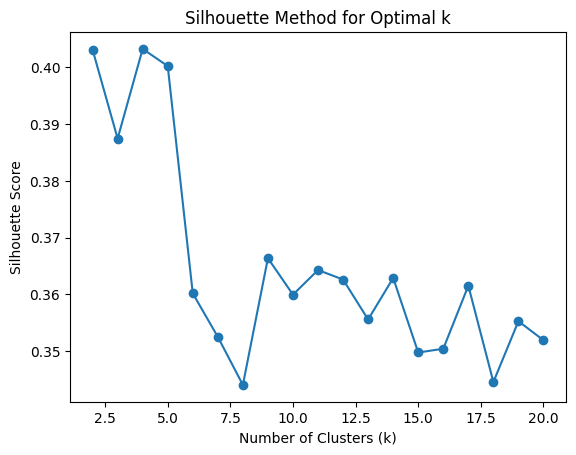

In [53]:
from sklearn.metrics import silhouette_score

def silhouette_method(X, max_k=10):
    scores = []
    for k in range(2, max_k + 1):  # k=1 has no silhouette score
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        scores.append(score)

    plt.plot(range(2, max_k + 1), scores, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method for Optimal k')
    plt.show()

silhouette_method(data_scaled, max_K)

## 3. Gap Statistic

**Concept:** Compares the WCSS of actual clusters with the expected WCSS if the data were randomly distributed. The optimal k is where the gap is the largest.

**Steps:**
1. Generate a reference dataset (randomly distributed points).
2. Compute WCSS for K-Means on both real and random data.
3. Compute the Gap Statistic:
\[ \text{Gap}(k) = E[\log(\text{WCSS}_{\text{random}})] - \log(\text{WCSS}_{\text{real}}) \]
4. Choose k where the Gap is maximized.

**Limitations of Gap Statistic:**
- Computationally expensive (requires resampling).
- May not be reliable if clusters have highly varying densities.


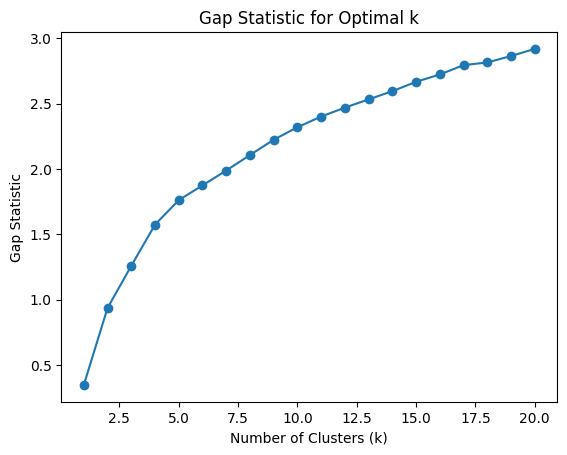

In [54]:
from sklearn.cluster import KMeans
from sklearn.utils import resample
import numpy as np

def gap_statistic(X, max_k=10, B=10):
    gaps = []
    WCSS_real = []
    WCSS_random = []
    
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        WCSS_real.append(np.log(kmeans.inertia_))  # Log WCSS
        
        # Generate B random samples
        random_WCSS = []
        for _ in range(B):
            X_random = np.random.uniform(X.min(axis=0), X.max(axis=0), X.shape)
            kmeans_random = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans_random.fit(X_random)
            random_WCSS.append(np.log(kmeans_random.inertia_))
        
        WCSS_random.append(np.mean(random_WCSS))
        gaps.append(np.mean(random_WCSS) - np.log(kmeans.inertia_))

    plt.plot(range(1, max_k + 1), gaps, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Gap Statistic')
    plt.title('Gap Statistic for Optimal k')
    plt.show()

gap_statistic(data_scaled, max_K)

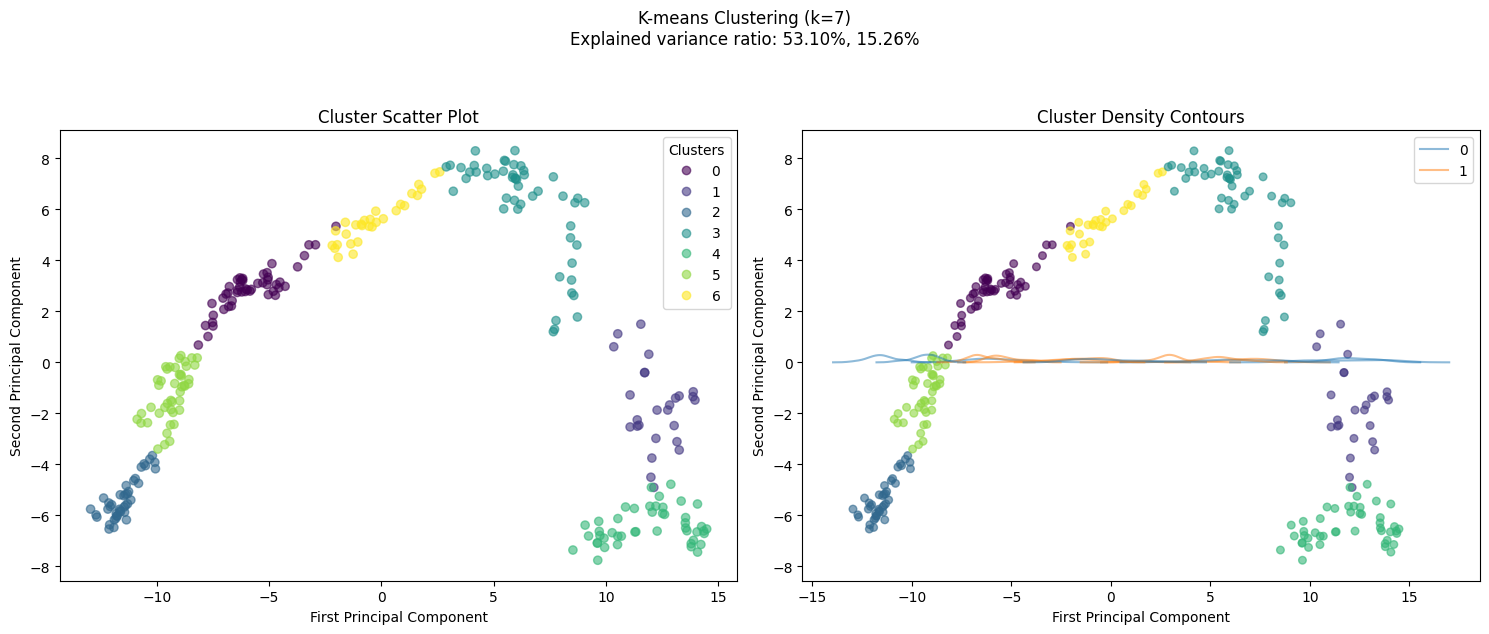

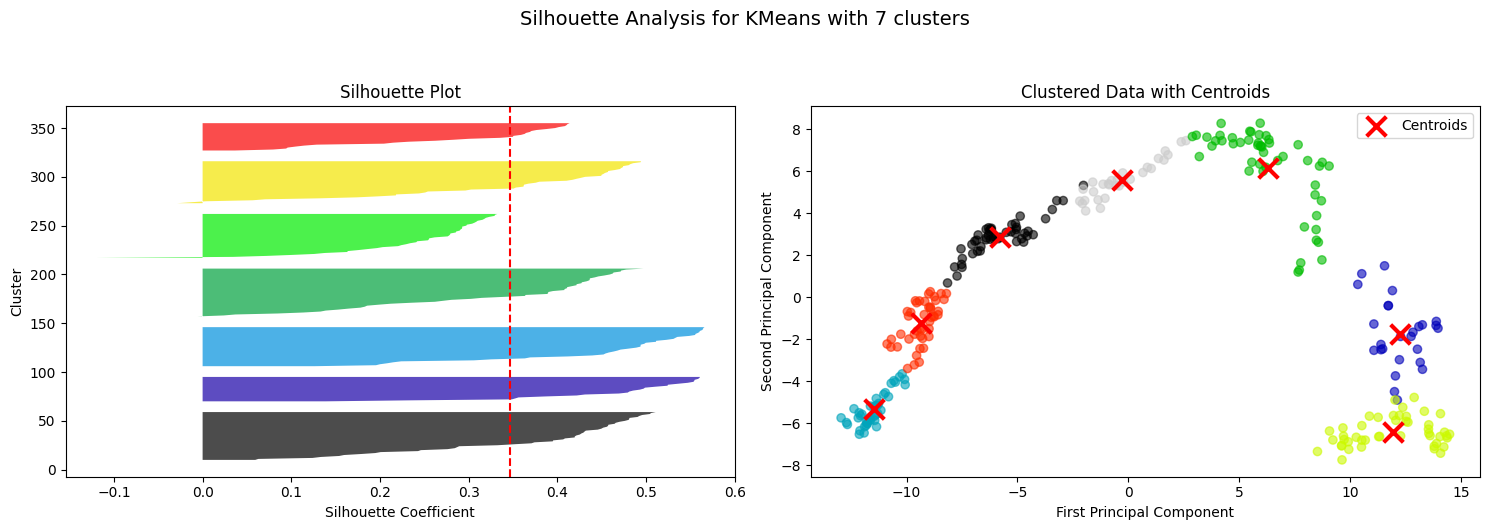

In [55]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

def plot_clusters(data_scaled, n_clusters=3):
    """
    Plot clusters using PCA for dimensionality reduction and different visualization methods
    
    Args:
        data_scaled: Scaled data matrix
        n_clusters: Number of clusters to form
    """
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    
    # Reduce dimensionality for visualization using PCA
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data_scaled)
    
    # Create figure with multiple subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. Scatter plot
    scatter = ax1.scatter(data_2d[:, 0], data_2d[:, 1], 
                         c=cluster_labels, cmap='viridis',
                         alpha=0.6)
    ax1.set_title('Cluster Scatter Plot')
    ax1.set_xlabel('First Principal Component')
    ax1.set_ylabel('Second Principal Component')
    ax1.legend(*scatter.legend_elements(), title="Clusters")
    
    # 2. Contour plot with density estimation
    for i in range(n_clusters):
        mask = cluster_labels == i
        sns.kdeplot(data=data_2d[mask], 
                   levels=5,
                   ax=ax2,
                   alpha=0.5)
    
    ax2.scatter(data_2d[:, 0], data_2d[:, 1],
                c=cluster_labels, cmap='viridis',
                alpha=0.6, s=30)
    ax2.set_title('Cluster Density Contours')
    ax2.set_xlabel('First Principal Component') 
    ax2.set_ylabel('Second Principal Component')
    
    # Add explained variance ratio
    explained_var = pca.explained_variance_ratio_
    fig.suptitle(f'K-means Clustering (k={n_clusters})\n' + 
                 f'Explained variance ratio: {explained_var[0]:.2%}, {explained_var[1]:.2%}',
                 y=1.05)
    
    plt.tight_layout()
    plt.show()

def plot_silhouette(data_scaled, n_clusters=3):
    """
    Plot silhouette analysis for K-means clustering
    
    Args:
        data_scaled: Scaled data matrix
        n_clusters: Number of clusters to form
    """
    from sklearn.metrics import silhouette_samples, silhouette_score
    
    # Compute clustering
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(data_scaled)
    
    # Compute silhouette scores
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels)
    
    # Create silhouette plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, alpha=0.7)
        
        y_lower = y_upper + 10
    
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette Coefficient")
    ax1.set_ylabel("Cluster")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # PCA plot with cluster centers
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data_scaled)
    centers_2d = pca.transform(clusterer.cluster_centers_)
    
    colors = plt.cm.nipy_spectral(np.linspace(0, 1, n_clusters))
    ax2.scatter(data_2d[:, 0], data_2d[:, 1], 
               c=cluster_labels, cmap='nipy_spectral',
               alpha=0.6)
    ax2.scatter(centers_2d[:, 0], centers_2d[:, 1],
                c='red', marker='x', s=200, linewidth=3,
                label='Centroids')
    ax2.set_title("Clustered Data with Centroids")
    ax2.set_xlabel("First Principal Component")
    ax2.set_ylabel("Second Principal Component")
    ax2.legend()
    
    plt.suptitle(f"Silhouette Analysis for KMeans with {n_clusters} clusters",
                 fontsize=14, y=1.05)
    plt.tight_layout()
    plt.show()

max_K = 7
plot_clusters(data_scaled, n_clusters=max_K)
plot_silhouette(data_scaled, n_clusters=max_K)

### Key features:

- Uses PCA to reduce dimensionality for visualization
- Shows explained variance ratio for PCA components
- Multiple visualization methods for better understanding
- Color-coded clusters with legends
- Centroids marked on plots
- Silhouette analysis for cluster quality assessment

### K-means Clustering Visualization Explanation

The code creates two sets of visualization plots for analyzing K-means clustering results:

1. **Cluster Visualization (`plot_clusters`)**
    This function creates two side-by-side plots:

    - **Left Plot: Cluster Scatter Plot**
      - Shows data points in 2D space after PCA reduction
      - Each color represents a different cluster
      - **X-axis:** First Principal Component
      - **Y-axis:** Second Principal Component
      - Points with the same color indicate they belong to the same cluster

    - **Right Plot: Density Contours**
      - Shows the density distribution of clusters
      - Contour lines indicate areas of similar point density
      - Darker regions show higher concentration of points
      - Helps visualize cluster overlap and separation

    - **Title Information**
      - Shows the number of clusters (k)
      - Displays explained variance ratio for both PCA components
      - Higher explained variance indicates better dimension reduction

2. **Silhouette Analysis (`plot_silhouette`)**
    This function also creates two plots:

    - **Left Plot: Silhouette Plot**
      - Shows silhouette coefficient for each point
      - **X-axis:** Silhouette coefficient (-1 to 1)
      - Higher values (closer to 1) indicate better clustering
      - Negative values suggest wrong cluster assignment
      - **Y-axis:** Clusters
      - Red dashed line: Average silhouette score

    - **Right Plot: Clustered Data with Centroids**
      - Similar to scatter plot but with centroids marked
      - Red X markers show cluster centers
      - Colors indicate cluster membership
      - Helps visualize cluster centers and their distribution

### Interpretation

For your data with `max_K = 7`:

- Look for well-separated clusters in scatter plots
- Check density contours for overlap
- Higher silhouette scores indicate better clustering
- Centroids should be well-separated

This visualization helps determine:

- Optimal number of clusters
- Quality of clustering
- Cluster separation and overlap
- Distribution of points within clusters


Cluster 0 stocks:
AMAT, AVY, CI, DHR, FANG, FCX, FMC, GD, GIS, MU, PEP, QCOM, REGN, TMO, XOM

Cluster 1 stocks:
AAPL, ABBV, ALL, APD, AVB, BXP, ECL, EQR, ESS, FDX, K, KIM, LMT, LOW, MAA, MMC, MMM, NOC, O, PG, PSA, REG, RTX, SHW, UDR, UNH, VICI, VTR, WELL

Cluster 2 stocks:
AMZN, AXP, BAC, BKR, BLK, BSX, C, CAT, COF, COST, CTVA, CVX, DLR, EMR, EOG, ETN, GE, GOOGL, GS, HON, ISRG, JPM, KMI, MET, MS, NOW, NVDA, ORCL, PH, PKG, PNC, PRU, RSG, SCHW, SPG, TFC, TSLA, USB, VMC, WFC, WM, WMB, WMT

Cluster 3 stocks:
ALB, AMD, APA, ARE, BA, CE, COP, CVI, CVS, DG, DLTR, DOW, DVN, EL, HAL, HES, HUM, INTC, LRCX, MOS, MPC, MRK, NKE, NUE, OXY, PPG, PSX, SLB, SNPS, TGT, UPS, VLO

Cluster 4 stocks:
ADBE, CCI, JNJ, PLD, UNP, ZTS

Cluster 5 stocks:
ABT, AON, BMY, CF, CRM, CSCO, DE, EQIX, GILD, HD, IBM, MA, MCD, NSC, ROK, SBUX, V

Cluster 6 stocks:
ADI, AMGN, AMT, CL, DD, KLAC, KMB, KO, LIN, LLY, MSFT, NEM, PFE, TXN, VRTX


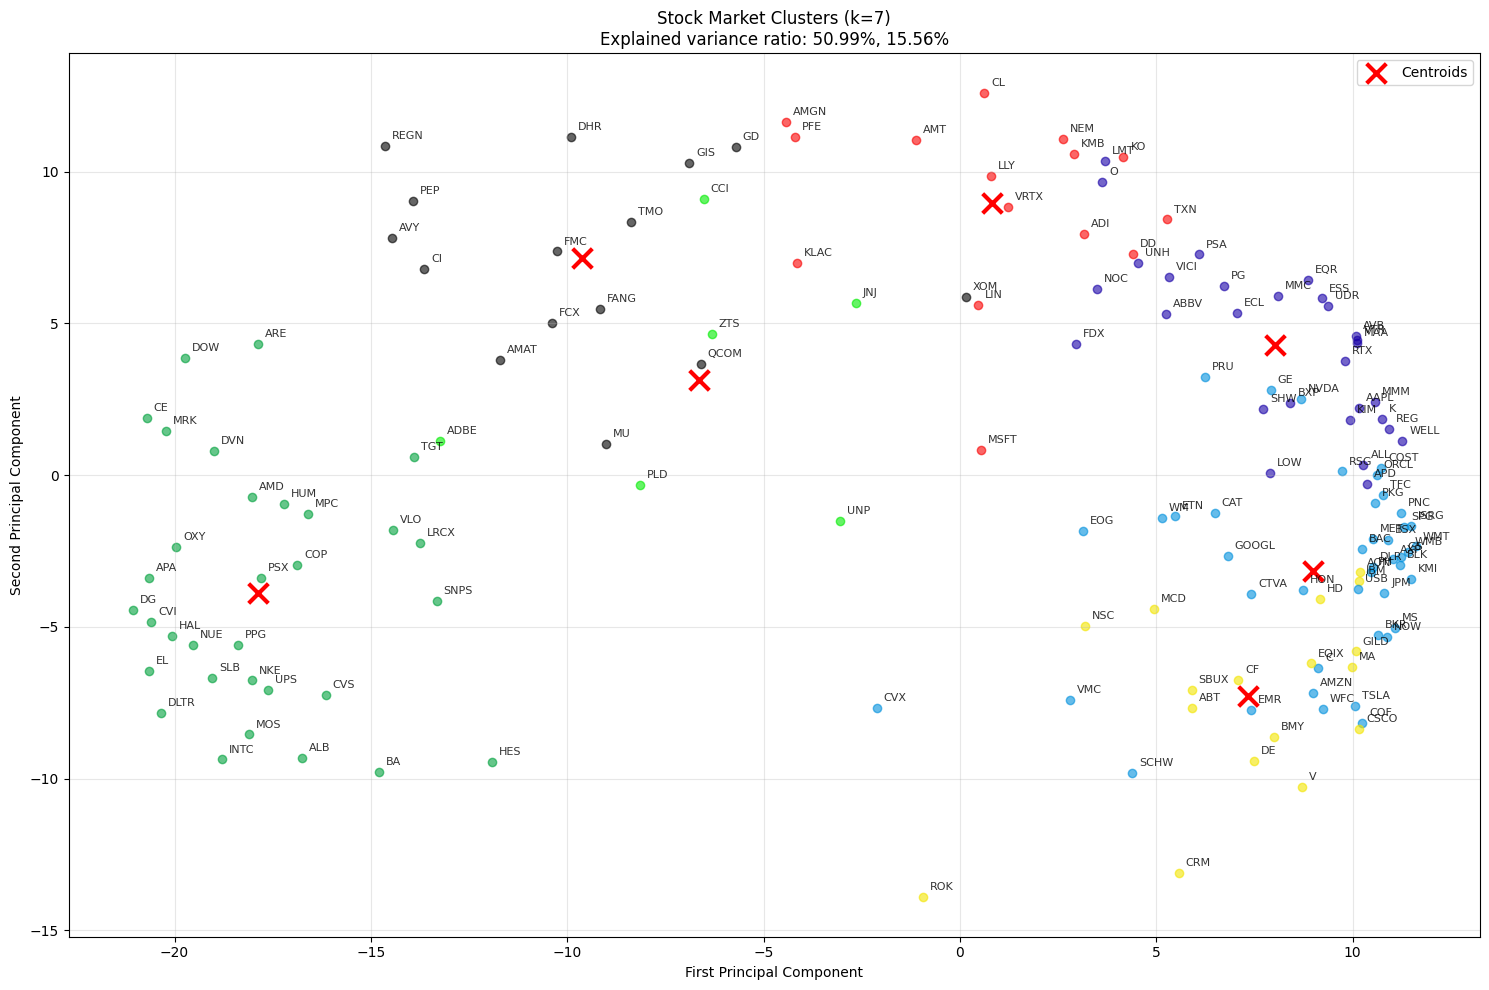


Cluster Statistics:

Cluster 0:
Number of stocks: 15
Stocks: AMAT, AVY, CI, DHR, FANG, FCX, FMC, GD, GIS, MU, PEP, QCOM, REGN, TMO, XOM

Cluster 1:
Number of stocks: 29
Stocks: AAPL, ABBV, ALL, APD, AVB, BXP, ECL, EQR, ESS, FDX, K, KIM, LMT, LOW, MAA, MMC, MMM, NOC, O, PG, PSA, REG, RTX, SHW, UDR, UNH, VICI, VTR, WELL

Cluster 2:
Number of stocks: 43
Stocks: AMZN, AXP, BAC, BKR, BLK, BSX, C, CAT, COF, COST, CTVA, CVX, DLR, EMR, EOG, ETN, GE, GOOGL, GS, HON, ISRG, JPM, KMI, MET, MS, NOW, NVDA, ORCL, PH, PKG, PNC, PRU, RSG, SCHW, SPG, TFC, TSLA, USB, VMC, WFC, WM, WMB, WMT

Cluster 3:
Number of stocks: 32
Stocks: ALB, AMD, APA, ARE, BA, CE, COP, CVI, CVS, DG, DLTR, DOW, DVN, EL, HAL, HES, HUM, INTC, LRCX, MOS, MPC, MRK, NKE, NUE, OXY, PPG, PSX, SLB, SNPS, TGT, UPS, VLO

Cluster 4:
Number of stocks: 6
Stocks: ADBE, CCI, JNJ, PLD, UNP, ZTS

Cluster 5:
Number of stocks: 17
Stocks: ABT, AON, BMY, CF, CRM, CSCO, DE, EQIX, GILD, HD, IBM, MA, MCD, NSC, ROK, SBUX, V

Cluster 6:
Number of stocks

In [56]:
def plot_stock_clusters(data_scaled, stocks, n_clusters=3):
    """
    Plot clusters with stock names
    
    Args:
        data_scaled: Scaled data matrix
        stocks: List of stock tickers
        n_clusters: Number of clusters to form
    """
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled.T)  # Transpose data to cluster stocks
    
    # Reduce dimensionality for visualization using PCA
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data_scaled.T)  # Transpose data
    centers_2d = pca.transform(kmeans.cluster_centers_)
    
    # Create figure
    plt.figure(figsize=(15, 10))
    
    # Plot points with stock names
    for i, (x, y, label, stock) in enumerate(zip(data_2d[:, 0], data_2d[:, 1], 
                                                cluster_labels, stocks)):
        plt.scatter(x, y, 
                   c=[plt.cm.nipy_spectral(label / n_clusters)],
                   alpha=0.6)
        plt.annotate(stock, 
                    (x, y),
                    xytext=(5, 5), 
                    textcoords='offset points',
                    fontsize=8,
                    alpha=0.8)
    
    # Plot centroids
    plt.scatter(centers_2d[:, 0], centers_2d[:, 1],
                c='red', marker='x', s=200, linewidth=3,
                label='Centroids')
    
    # Print cluster memberships
    for i in range(n_clusters):
        mask = cluster_labels == i
        cluster_stocks = np.array(stocks)[mask]
        print(f"\nCluster {i} stocks:")
        print(', '.join(cluster_stocks))
    
    # Add title and labels
    plt.title(f'Stock Market Clusters (k={n_clusters})\n' + 
             f'Explained variance ratio: {pca.explained_variance_ratio_[0]:.2%}, {pca.explained_variance_ratio_[1]:.2%}')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Return cluster assignments
    return pd.Series(cluster_labels, index=stocks, name='Cluster')

# Use the function
cluster_assignments = plot_stock_clusters(data_scaled, data_close.columns, n_clusters=max_K)

# Print summary statistics for each cluster
print("\nCluster Statistics:")
for cluster in range(max_K):
    stocks_in_cluster = cluster_assignments[cluster_assignments == cluster].index
    print(f"\nCluster {cluster}:")
    print(f"Number of stocks: {len(stocks_in_cluster)}")
    print("Stocks:", ', '.join(stocks_in_cluster))


Cluster 0 (15 stocks):

Technology (3):
AMAT, MU, QCOM

Materials (3):
AVY, FCX, FMC

Healthcare (4):
CI, DHR, REGN, TMO

Energy (2):
FANG, XOM

Industrial (1):
GD

Consumer (2):
GIS, PEP

Cluster 1 (29 stocks):

Technology (1):
AAPL

Healthcare (2):
ABBV, UNH

Financial (2):
ALL, MMC

Materials (3):
APD, ECL, SHW

Real Estate (13):
AVB, BXP, EQR, ESS, KIM, MAA, O, PSA, REG, UDR, VICI, VTR, WELL

Industrial (5):
FDX, LMT, MMM, NOC, RTX

Consumer (3):
K, LOW, PG

Cluster 2 (43 stocks):

Consumer (4):
AMZN, COST, TSLA, WMT

Financial (15):
AXP, BAC, BLK, C, COF, GS, JPM, MET, MS, PNC, PRU, SCHW, TFC, USB, WFC

Energy (5):
BKR, CVX, EOG, KMI, WMB

Healthcare (2):
BSX, ISRG

Industrial (8):
CAT, EMR, ETN, GE, HON, PH, RSG, WM

Materials (3):
CTVA, PKG, VMC

Real Estate (2):
DLR, SPG

Technology (4):
GOOGL, NOW, NVDA, ORCL

Cluster 3 (32 stocks):

Materials (6):
ALB, CE, DOW, MOS, NUE, PPG

Technology (4):
AMD, INTC, LRCX, SNPS

Energy (11):
APA, COP, CVI, DVN, HAL, HES, MPC, OXY, PSX, SLB

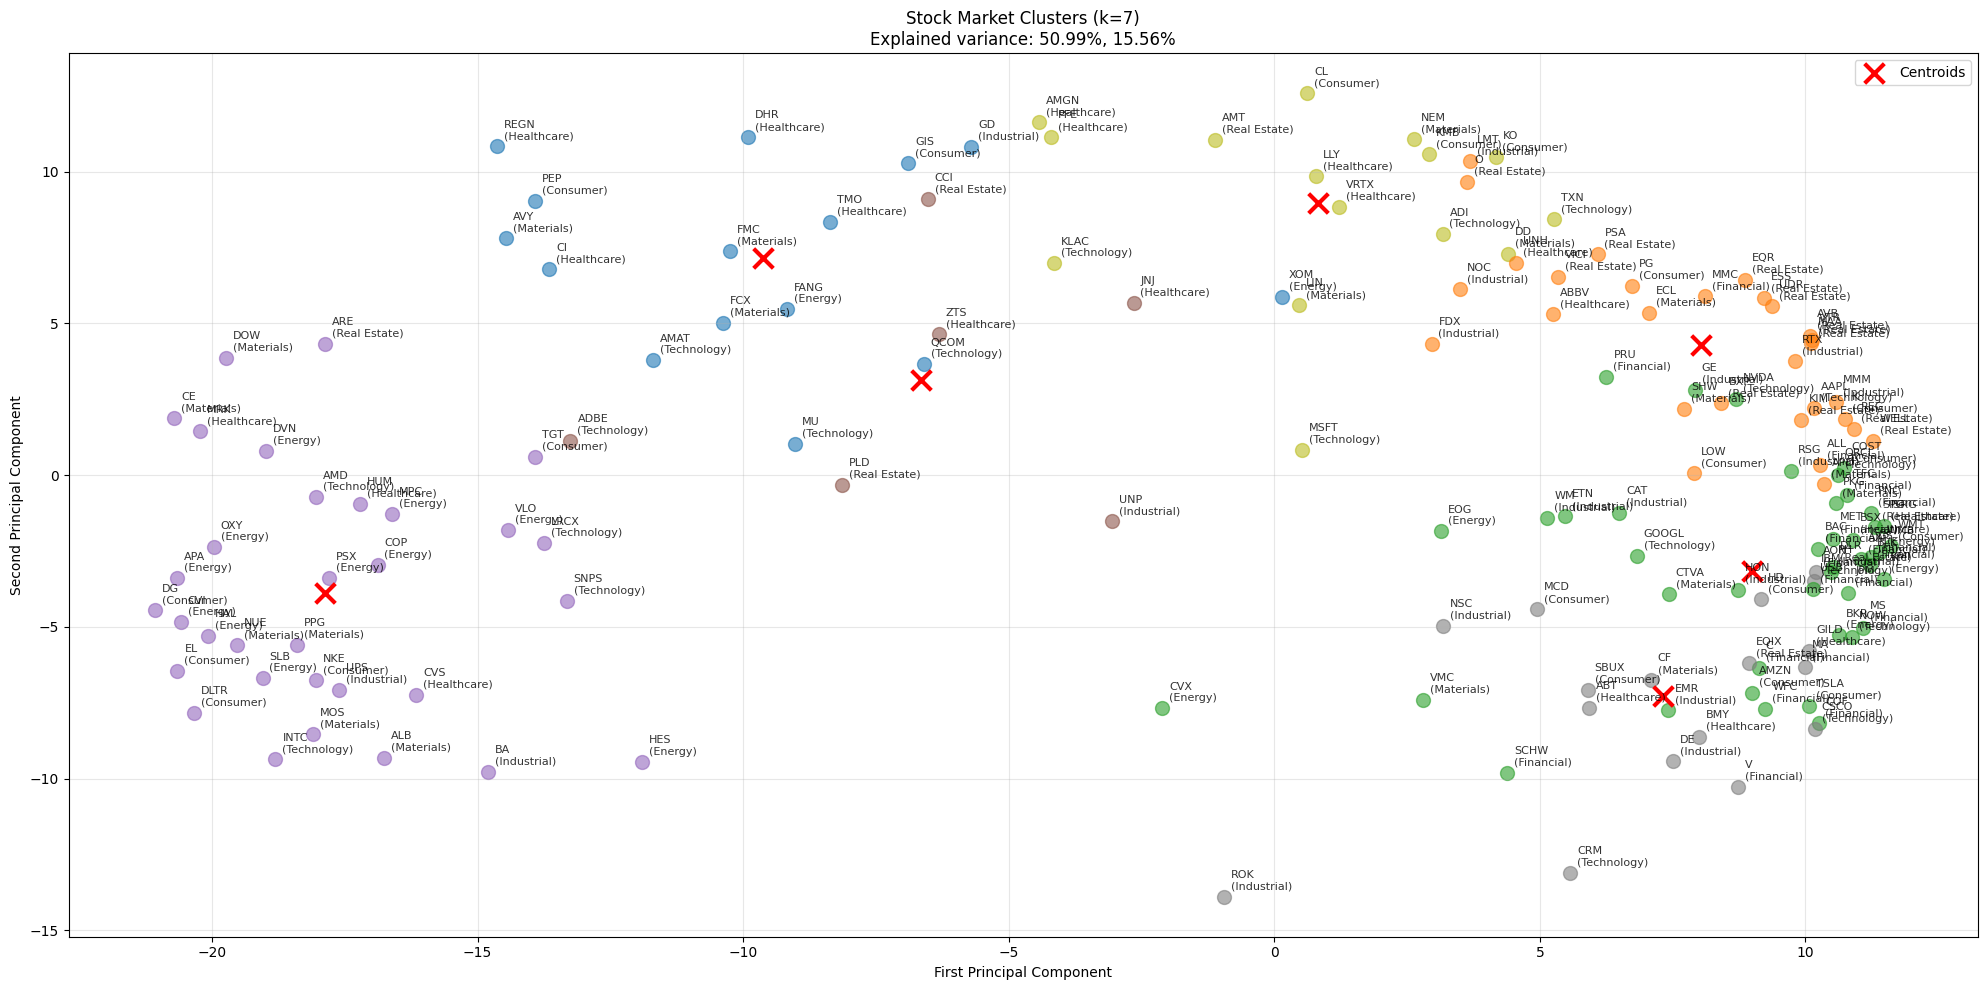


Cluster 0 Analysis:
--------------------------------------------------
Sector Composition:
Technology: 3 stocks (20.0%)
Materials: 3 stocks (20.0%)
Healthcare: 4 stocks (26.7%)
Energy: 2 stocks (13.3%)
Industrial: 1 stocks (6.7%)
Consumer: 2 stocks (13.3%)

Performance Metrics:
Average Daily Return: 0.01%
Average Volatility: 1.82%

Cluster 1 Analysis:
--------------------------------------------------
Sector Composition:
Technology: 1 stocks (3.4%)
Healthcare: 2 stocks (6.9%)
Financial: 2 stocks (6.9%)
Materials: 3 stocks (10.3%)
Real Estate: 13 stocks (44.8%)
Industrial: 5 stocks (17.2%)
Consumer: 3 stocks (10.3%)

Performance Metrics:
Average Daily Return: 0.07%
Average Volatility: 1.37%

Cluster 2 Analysis:
--------------------------------------------------
Sector Composition:
Consumer: 4 stocks (9.3%)
Financial: 15 stocks (34.9%)
Energy: 5 stocks (11.6%)
Healthcare: 2 stocks (4.7%)
Industrial: 8 stocks (18.6%)
Materials: 3 stocks (7.0%)
Real Estate: 2 stocks (4.7%)
Technology: 4 s

In [57]:
def plot_stock_clusters(data_scaled, data_close, sectors, n_clusters=3):
    """
    Plot stock clusters with names and sector information
    
    Args:
        data_scaled: Scaled data matrix
        data_close: Original price data with stock names
        sectors: Dictionary of sector classifications
        n_clusters: Number of clusters to form
    """
    # Perform K-means clustering on transposed data (clustering stocks, not dates)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled.T)  # Transpose to cluster stocks
    
    # Reduce dimensionality for visualization
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data_scaled.T)  # Transpose to match clustering
    centers_2d = pca.transform(kmeans.cluster_centers_)
    
    # Create figure
    plt.figure(figsize=(20, 10))
    
    # Plot points with stock names
    for i, stock in enumerate(data_close.columns):
        # Get sector for color coding
        sector = next((s for s, stocks in sectors.items() if stock in stocks), 'Unknown')
        plt.scatter(data_2d[i, 0], data_2d[i, 1], 
                   c=[plt.cm.tab10(cluster_labels[i] / n_clusters)],
                   alpha=0.6, s=100)
        plt.annotate(f'{stock}\n({sector})', 
                    (data_2d[i, 0], data_2d[i, 1]),
                    xytext=(5, 5), 
                    textcoords='offset points',
                    fontsize=8,
                    alpha=0.8)
    
    # Plot centroids
    plt.scatter(centers_2d[:, 0], centers_2d[:, 1],
               c='red', marker='x', s=200, linewidth=3,
               label='Centroids')
    
    # Print cluster compositions
    for i in range(n_clusters):
        cluster_stocks = data_close.columns[cluster_labels == i]
        print(f"\nCluster {i} ({len(cluster_stocks)} stocks):")
        # Group by sector
        sector_counts = {}
        for stock in cluster_stocks:
            sector = next((s for s, stocks in sectors.items() if stock in stocks), 'Unknown')
            sector_counts[sector] = sector_counts.get(sector, []) + [stock]
        
        # Print sector-wise breakdown
        for sector, stocks in sector_counts.items():
            print(f"\n{sector} ({len(stocks)}):")
            print(', '.join(stocks))
    
    # Add title and labels
    plt.title(f'Stock Market Clusters (k={n_clusters})\n' + 
             f'Explained variance: {pca.explained_variance_ratio_[0]:.2%}, {pca.explained_variance_ratio_[1]:.2%}')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Return cluster assignments for further analysis
    return pd.Series(cluster_labels, index=data_close.columns, name='Cluster')

# Run the analysis
cluster_results = plot_stock_clusters(data_scaled, data_close, sectors, n_clusters=max_K)

# Optional: Calculate and display cluster statistics
def analyze_clusters(cluster_results, data_close, sectors):
    """Print detailed cluster analysis"""
    for cluster in range(max_K):
        cluster_stocks = cluster_results[cluster_results == cluster].index
        print(f"\nCluster {cluster} Analysis:")
        print("-" * 50)
        
        # Sector composition
        sector_comp = {}
        for stock in cluster_stocks:
            sector = next((s for s, stocks in sectors.items() if stock in stocks), 'Unknown')
            sector_comp[sector] = sector_comp.get(sector, 0) + 1
            
        print("Sector Composition:")
        for sector, count in sector_comp.items():
            print(f"{sector}: {count} stocks ({count/len(cluster_stocks)*100:.1f}%)")
        
        # Performance metrics
        returns = data_close[cluster_stocks].pct_change()
        print("\nPerformance Metrics:")
        print(f"Average Daily Return: {returns.mean().mean()*100:.2f}%")
        print(f"Average Volatility: {returns.std().mean()*100:.2f}%")

# Run analysis
analyze_clusters(cluster_results, data_close, sectors)